In [1]:
import pandas as pd
from joblib import load
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, precision_recall_curve, roc_auc_score

In [2]:
clf = load("../data/model.joblib")
scaler = load("../data/scaler.joblib")
df = pd.read_csv("../data/clean_data.csv")

In [3]:
def convert_to_unix_timestamp(df, attribute):
    df[attribute] = df[attribute].apply(lambda x: "19" + str(x))
    df[attribute] = pd.to_datetime(df[attribute], format="%Y%m%d").map(pd.Timestamp.timestamp)
    return df

In [4]:
for attribute in ['ownerBirthday', 'accountCreationDate', 'loanDate']:
    df = convert_to_unix_timestamp(df, attribute)
    
df = pd.get_dummies(df, columns=['frequency', 'region', 'frequency', 'districtName'], drop_first=True)
df = df.drop('loanDate', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('status',axis=1), df['status'], test_size=0.20, random_state=42, shuffle=False, stratify=None)

In [6]:
clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)

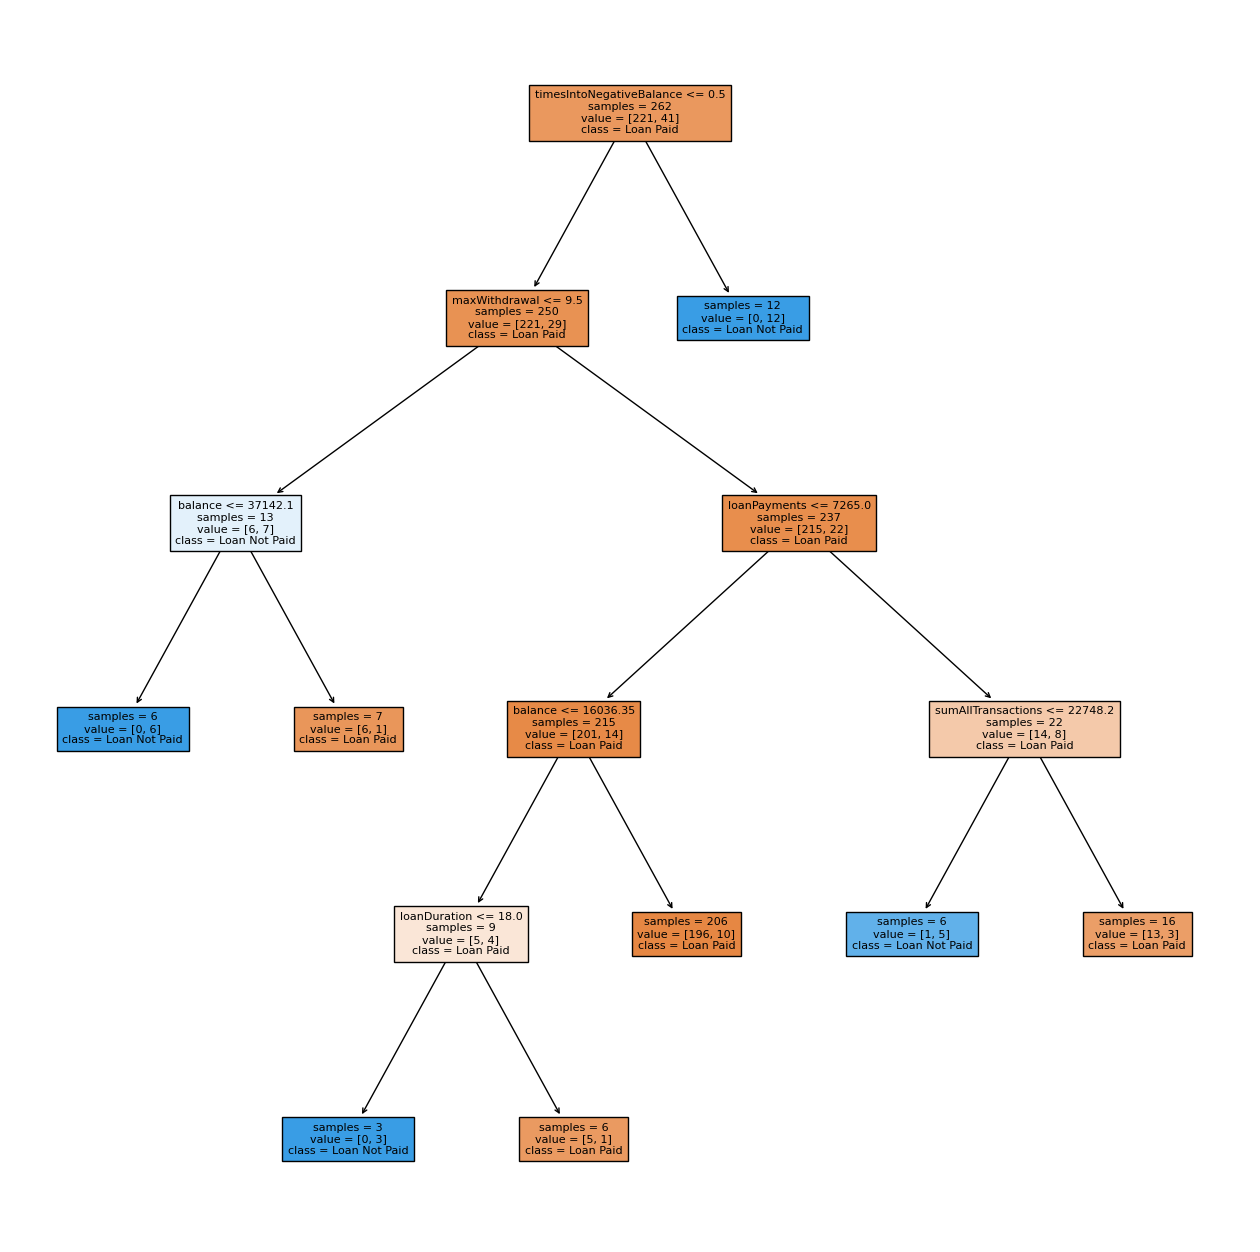

In [7]:
plt.figure(figsize=(16,16))
tree.plot_tree(clf, fontsize=8, impurity=False,feature_names=df.drop('status',axis=1).columns, class_names=['Loan Paid', 'Loan Not Paid'], filled=True)
plt.show()

In [8]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print({
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': roc_auc
        })

{'accuracy': 0.9090909090909091, 'precision': 0.3333333333333333, 'recall': 0.2, 'f1': 0.25, 'auc': 0.7295081967213115}
